# LAB 9 Gale-Shapley and Irving Algorithms

Diego Alejandro Alvarado Chaparro

In [121]:
import numpy as np
import random
import matplotlib.pyplot as plt

## PUNTO 1

In [119]:
#Gale-Shapley
#Recibe dos matrices
def gale_shapley(ml, women_lists):
  #wl es un numpy array para saber más facilmente que prioridad tiene la mujer
  #i-esima con el hombre j-esimo, ya que female_lists viene de forma "3 2 1"
  #que quiere decir que prefiere estar más con el hombre 3, y si no con el 2,
  #y de últimas con el 1. ml lo que hace es convertir eso a [3, 2, 1], para
  #que al buscar que tanta prioridad tiene con el hombre 3 solo se busque wl[2]

  n = len(women_lists)

  wl = np.empty([n,n])

  free_men = []
  women_promised = [-1 for i in range(n)]

  iterations = 0

  for i,l in enumerate(women_lists):
    for j,p in enumerate(women_lists[i]):
      #Se asignan los valores de wl
      wl[i][p-1] = j
      #Inicialmente todos los hombres estan solteros
    free_men.append(i)
  
  while free_men:
    man_i = free_men.pop(0)
    iterations = iterations + 1
    prefered_by_man_i = ml[man_i][0] - 1
    if women_promised[prefered_by_man_i] == -1:
      women_promised[prefered_by_man_i] = man_i
    else:
      if wl[prefered_by_man_i][man_i] < wl[prefered_by_man_i][women_promised[prefered_by_man_i]]:
        free_men.append(women_promised[prefered_by_man_i])
        ml[women_promised[prefered_by_man_i]].pop(0)
        women_promised[prefered_by_man_i] = man_i
      else:
        free_men.append(man_i)
        ml[man_i].pop(0)

  return [women_promised, iterations]

In [120]:
#Test
res = gale_shapley([[3,2,1],[1,2,3],[3,2,1]],[[3,2,1],[2,1,3],[3,1,2]])
for w,m in enumerate(res[0]):
  print("Hombre",m+1, "con Mujer", w+1)
print("En", res[1], "iteraciones")

Hombre 2 con Mujer 1
Hombre 1 con Mujer 2
Hombre 3 con Mujer 3
En 4 iteraciones


### Peor caso con n = 4

In [143]:
n4_worst_ml = [[1,2,3,4],[2,3,1,4],[3,1,2,4],[1,2,3,4]]
n4_worst_wl = [[2,3,4,1],[3,4,1,2],[4,1,2,3],[1,2,3,4]]

res = gale_shapley(n4_worst_ml, n4_worst_wl)
for w,m in enumerate(res[0]):
  print("Hombre",m+1, "con Mujer", w+1)
print("En", res[1], "iteraciones")

Hombre 2 con Mujer 1
Hombre 3 con Mujer 2
Hombre 4 con Mujer 3
Hombre 1 con Mujer 4
En 13 iteraciones


### Peor caso con n = 40

In [164]:
n40_worst_ml = []
n40_worst_wl = []

normal_list_n40 = [i for i in range(1,41)]

n40_worst_ml.append(normal_list_n40)
#print(n40_worst_ml[0])

for i in range(1,40):
  n40_worst_ml.append(normal_list_n40[i:40-1] + normal_list_n40[:i] + [40])
  #print(n40_worst_ml[i])

for i in range(40):
  n40_worst_wl.append(normal_list_n40[i+1:] + normal_list_n40[:i+1])
  #print(n40_worst_wl[i])

res = gale_shapley(n40_worst_ml, n40_worst_wl)
for w,m in enumerate(res[0]):
  print("Hombre",m+1, "con Mujer", w+1)
print("En", res[1], "iteraciones")


Hombre 2 con Mujer 1
Hombre 3 con Mujer 2
Hombre 4 con Mujer 3
Hombre 5 con Mujer 4
Hombre 6 con Mujer 5
Hombre 7 con Mujer 6
Hombre 8 con Mujer 7
Hombre 9 con Mujer 8
Hombre 10 con Mujer 9
Hombre 11 con Mujer 10
Hombre 12 con Mujer 11
Hombre 13 con Mujer 12
Hombre 14 con Mujer 13
Hombre 15 con Mujer 14
Hombre 16 con Mujer 15
Hombre 17 con Mujer 16
Hombre 18 con Mujer 17
Hombre 19 con Mujer 18
Hombre 20 con Mujer 19
Hombre 21 con Mujer 20
Hombre 22 con Mujer 21
Hombre 23 con Mujer 22
Hombre 24 con Mujer 23
Hombre 25 con Mujer 24
Hombre 26 con Mujer 25
Hombre 27 con Mujer 26
Hombre 28 con Mujer 27
Hombre 29 con Mujer 28
Hombre 30 con Mujer 29
Hombre 31 con Mujer 30
Hombre 32 con Mujer 31
Hombre 33 con Mujer 32
Hombre 34 con Mujer 33
Hombre 35 con Mujer 34
Hombre 36 con Mujer 35
Hombre 37 con Mujer 36
Hombre 38 con Mujer 37
Hombre 39 con Mujer 38
Hombre 40 con Mujer 39
Hombre 1 con Mujer 40
En 1561 iteraciones


## PUNTO 2

In [114]:
#Generar permutacion aleatoria
def get_random_permutation(n):
  normal_list = [i for i in range(1,n+1)]
  permutation = []
  for i in range(n):
    e = random.choice(normal_list)
    permutation.append(e)
    normal_list.remove(e)
  return permutation

### n = 4

Mínimas iteraciones: 4
Máximas iteraciones: 12
Iteraciones promedio: 6.73


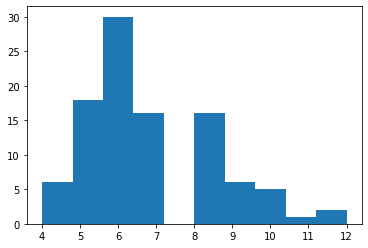

In [137]:
iteraciones = np.empty(100)
min_it = -1
max_it = -1

for i in range(100):
  ml = []
  wl = []
  for j in range(4):
    ml.append(get_random_permutation(4))
    wl.append(get_random_permutation(4))
  
  res = gale_shapley(ml, wl)
  iteraciones[i] = res[1]

  if min_it == -1:
    min_it = res[1]
  
  if min_it > res[1]:
    min_it = res[1]
  
  if max_it < res[1]:
    max_it = res[1]

print("Mínimas iteraciones:", min_it)
print("Máximas iteraciones:", max_it)
print("Iteraciones promedio:", iteraciones.mean())

plt.hist(iteraciones);

### n = 40

Mínimas iteraciones: 90
Máximas iteraciones: 264
Iteraciones promedio: 154.93


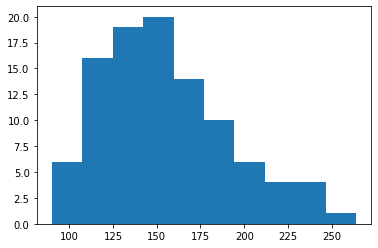

In [140]:
iteraciones = np.empty(100)
min_it = -1
max_it = -1

for i in range(100):
  ml = []
  wl = []
  for j in range(40):
    ml.append(get_random_permutation(40))
    wl.append(get_random_permutation(40))
  
  res = gale_shapley(ml, wl)
  iteraciones[i] = res[1]

  if min_it == -1:
    min_it = res[1]
  
  if min_it > res[1]:
    min_it = res[1]
  
  if max_it < res[1]:
    max_it = res[1]

print("Mínimas iteraciones:", min_it)
print("Máximas iteraciones:", max_it)
print("Iteraciones promedio:", iteraciones.mean())

plt.hist(iteraciones);